# Customer Churn Prediction

## Problem Statement

Customer churn is a critical metric for any business. It's much more expensive to acquire a new customer than to retain an existing one, so it's important to be able to predict which customers are likely to churn. This allows the business to take proactive steps to retain those customers, such as offering them special deals or discounts.

In this project, we will use machine learning to predict customer churn. We will train several different models on a dataset of customer interactions, and evaluate their performance using a test dataset. We will also explore the data to identify any patterns or relationships that might help us to understand why customers churn.

## Author

- [Carlos Alvarado Martinez](https://calvarado04.com)

## Data

The dataset contains information about customer interactions with a services company. The data includes the following columns:

- **CustomerID**: A unique identifier for
- **Age**: The age of the customer
- **Tenure**: The length of time that the customer has been with
- **Gender**: The gender of the customer
- **Subscription Type**: The type of subscription that the customer has ("Basic", "Standard", "Premium")
- **Last Interaction**: The date of the customer's last interaction with the company
- **Total Spend**: The total amount of money that the customer has spent
- **Payment Delay**: The number of days that the customer's payment is delayed
- **Support Calls**: The number of support calls that the customer has made
- **Usage Frequency**: The frequency with which the customer uses the service
- **Contract Length**: The length of the customer's contract ("Monthly", "Quarterly", "Yearly")
- **Churn**: Whether the customer has churned ("Yes" or "No")

## Dataset Source 

We used Kaggle to get the dataset, you can find it [here](https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset/data)

## Approach

We will start by loading the data and exploring it to understand the features and the target variable. Then we will preprocess the data and train several different models on it. We will evaluate the performance of the models using a test dataset, and explore the data to identify any patterns or relationships that might help us to understand why customers churn.

## Process data

We will start by loading the data and exploring it to understand the features and the target variable. Then we will preprocess the data and train several different models on it. We will evaluate the performance of the models using a test dataset, and explore the data to identify any patterns or relationships that might help us to understand why customers churn.


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

import pandas as pd

# Load the datasets
train_data_path = './data/customer_churn_dataset-training-master.csv'
test_data_path = './data/customer_churn_dataset-testing-master.csv'

train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

# Display the first few rows of the training data and test data
train_data_head = train_data.head()
test_data_head = test_data.head()

print(train_data_head)
print(test_data_head)

# Display basic information about the datasets
train_data_info = train_data.info()
test_data_info = test_data.info()

print(train_data_info)
print(test_data_info)


# Drop 'CustomerID' as it's not useful for modeling
train_data.drop(columns=['CustomerID'], inplace=True)
test_data.drop(columns=['CustomerID'], inplace=True)

# Drop NaN values
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)


# Separate features and target variable
X_train = train_data.drop('Churn', axis=1)
y_train = train_data['Churn']
X_test = test_data.drop('Churn', axis=1)
y_test = test_data['Churn']

# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])





   CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0         2.0  30.0  Female    39.0             14.0            5.0   
1         3.0  65.0  Female    49.0              1.0           10.0   
2         4.0  55.0  Female    14.0              4.0            6.0   
3         5.0  58.0    Male    38.0             21.0            7.0   
4         6.0  23.0    Male    32.0             20.0            5.0   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0           18.0          Standard          Annual        932.0   
1            8.0             Basic         Monthly        557.0   
2           18.0             Basic       Quarterly        185.0   
3            7.0          Standard         Monthly        396.0   
4            8.0             Basic         Monthly        617.0   

   Last Interaction  Churn  
0              17.0    1.0  
1               6.0    1.0  
2               3.0    1.0  
3              29.0    1.0  
4              20.0    1.

# Correlation Analysis

Based on the correlation matrix, we can see that there are not so much strong correlations between the numerical features and the target variable (Churn). The highest correlation is between 'Support Calls and 'Payment Delay', also 'Age' and 'Last Interaction' have a moderate correlation.

On the categorical features, we can see that the monthly contract length has the highest churn rate. Also female customers have a higher churn rate and basic subscription type is slightly higher than the other types.

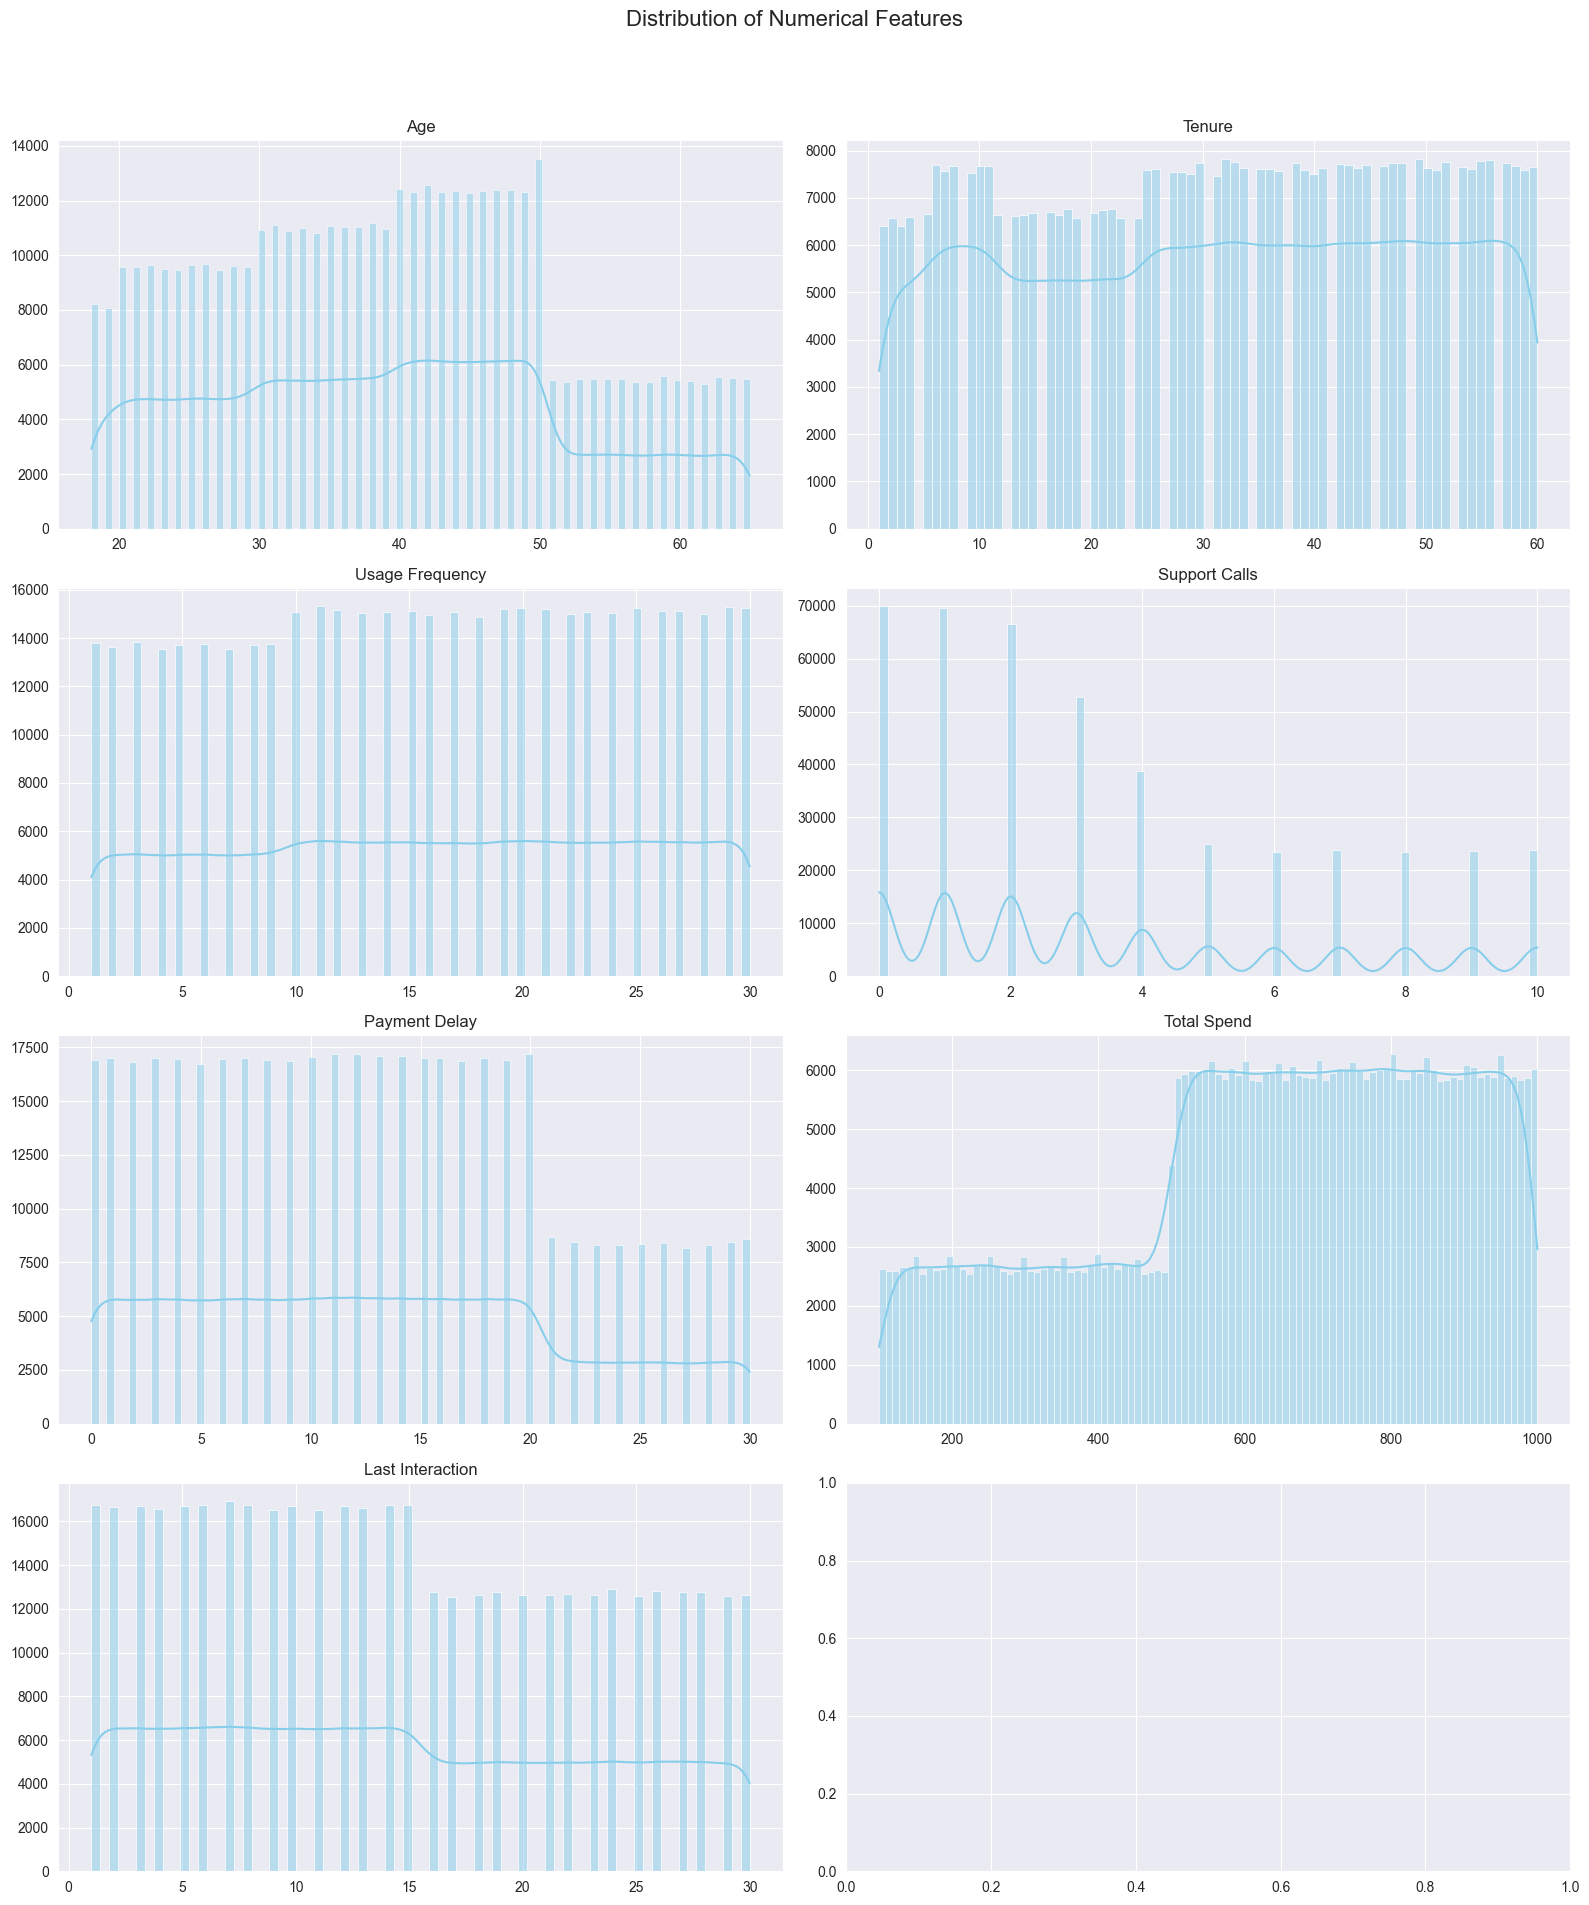

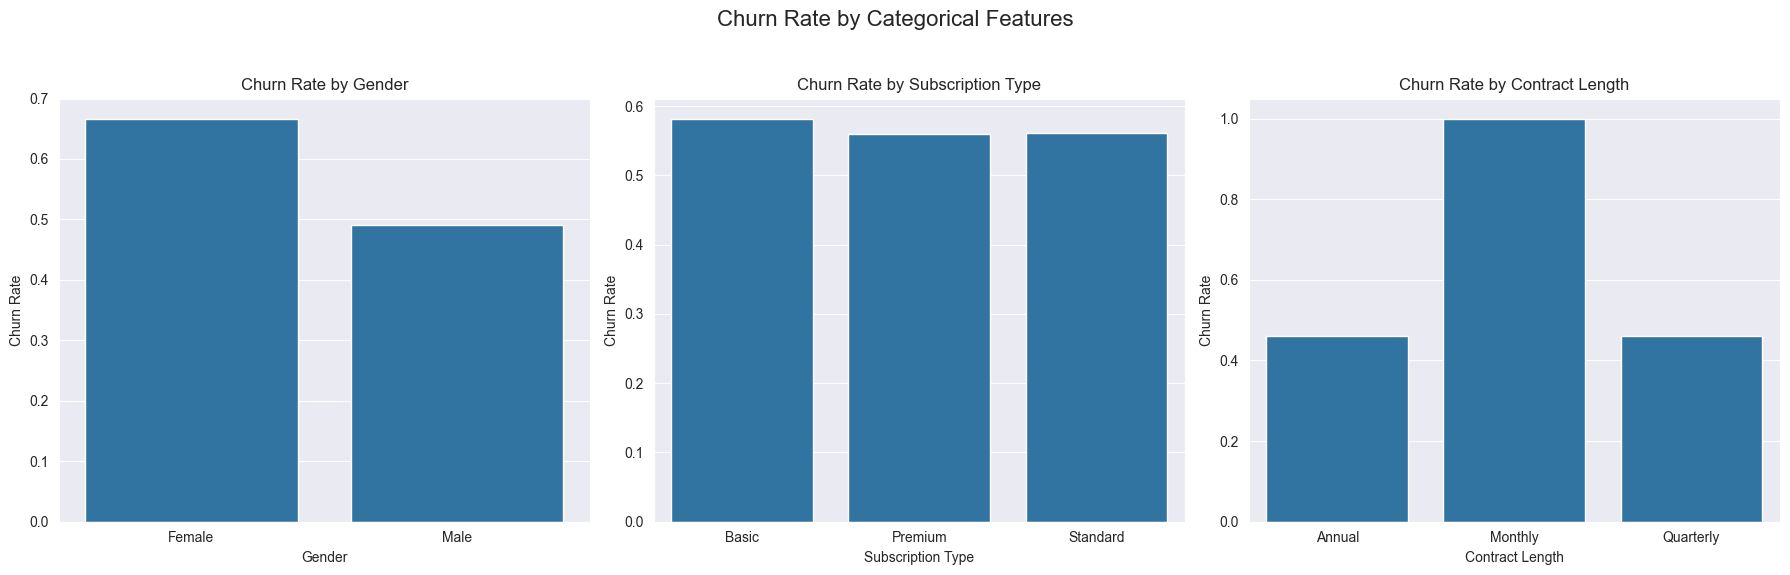

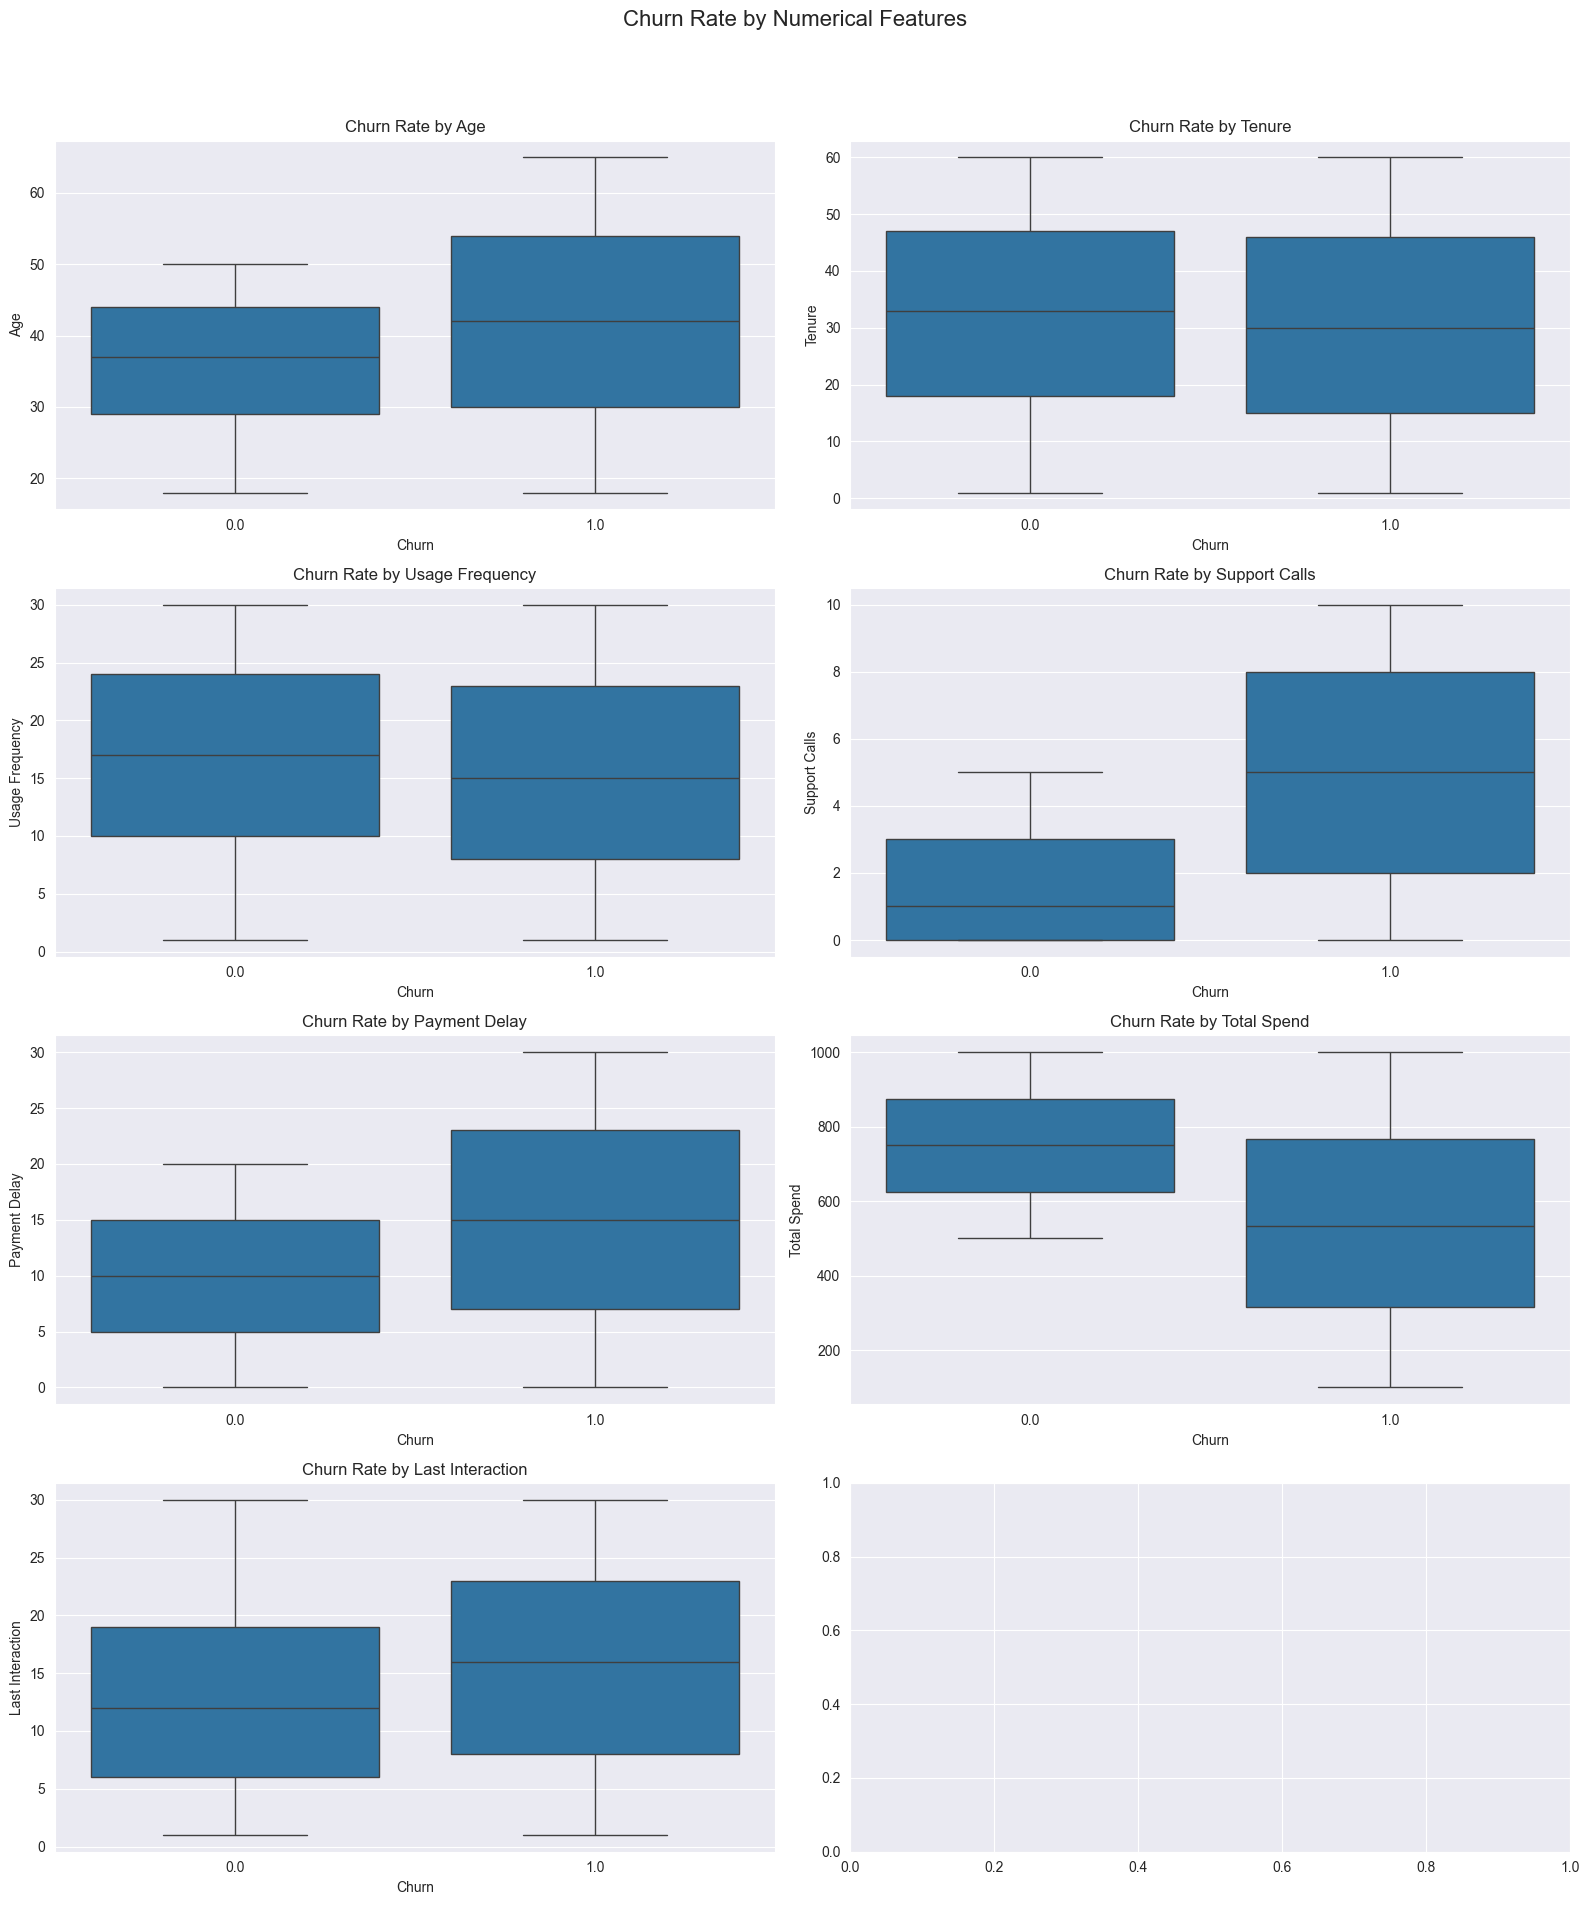

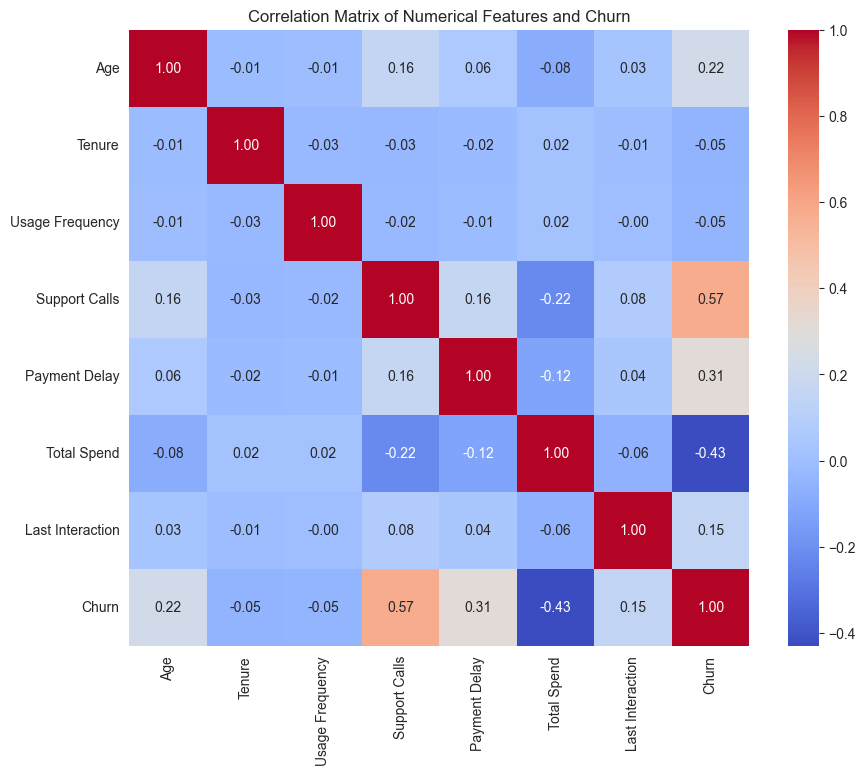

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

# use the train_data_upsampled dataset for the rest of the analysis
#train_data = train_data_upsampled

# Distribution of Numerical Features
numerical_features = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 20))
fig.suptitle('Distribution of Numerical Features', fontsize=16)

for i, col in enumerate(numerical_features):
    sns.histplot(train_data[col], kde=True, ax=axes[i//2, i%2], color='skyblue')
    axes[i//2, i%2].set_title(col)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


# Categorical Feature Analysis - Churn Rate by Category
categorical_features = ['Gender', 'Subscription Type', 'Contract Length']
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Churn Rate by Categorical Features', fontsize=16)

for i, col in enumerate(categorical_features):
    churn_rate_by_cat = train_data.groupby(col)['Churn'].mean()
    sns.barplot(x=churn_rate_by_cat.index, y=churn_rate_by_cat.values, ax=axes[i])
    axes[i].set_title(f'Churn Rate by {col}')
    axes[i].set_ylabel('Churn Rate')
    axes[i].set_xlabel(col)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Churn Rate by Numerical Features
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 20))
fig.suptitle('Churn Rate by Numerical Features', fontsize=16)

for i, col in enumerate(numerical_features):
    sns.boxplot(x='Churn', y=col, data=train_data, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Churn Rate by {col}')
    axes[i//2, i%2].set_xlabel('Churn')
    axes[i//2, i%2].set_ylabel(col)
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


# Correlation Analysis
correlation_matrix = train_data[numerical_features + ['Churn']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Churn')
plt.show()




# Random Forest Model

We will start by training a Random Forest model on the preprocessed data. We will use the preprocessor to transform the data and then fit the model to the training data. We will then use the model to predict the target variable for the validation data and evaluate its performance using the classification report. Finally, we will use the test data to evaluate the model's performance.


In [3]:

# Define the model
model = RandomForestClassifier()

# Create a preprocessing and modeling pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Split the data
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train_split, y_train_split)

# Predict and evaluate
y_pred = pipeline.predict(X_val_split)
print(classification_report(y_val_split, y_pred))

# Use test data to evaluate the model
y_pred_test = pipeline.predict(X_test)
print(classification_report(y_test, y_pred_test))

# random forest accuracy
random_forest_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Random Forest Accuracy: {random_forest_accuracy}")


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38063
         1.0       1.00      1.00      1.00     50104

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167
              precision    recall  f1-score   support

           0       0.98      0.06      0.11     33881
           1       0.49      1.00      0.66     30493

    accuracy                           0.50     64374
   macro avg       0.73      0.53      0.38     64374
weighted avg       0.75      0.50      0.37     64374

Random Forest Accuracy: 0.5039301581383788


# Naive Bayes Model

Naive Bayes is a simple but powerful algorithm for classification. It is based on Bayes' theorem, which describes the probability of an event based on prior knowledge of conditions that might be related to the event. In the context of customer churn prediction, Naive Bayes can be used to calculate the probability that a customer will churn based on their interactions with the company.


In [4]:
from sklearn.naive_bayes import GaussianNB

# Define the Gaussian Naive Bayes model
nb_model = GaussianNB()

# Update the pipeline with the Naive Bayes model
nb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', nb_model)])

# Fit the Naive Bayes model
nb_pipeline.fit(X_train_split, y_train_split)

# Predict and evaluate with the Naive Bayes model
y_pred_nb = nb_pipeline.predict(X_val_split)
print(classification_report(y_val_split, y_pred_nb))

# Use test data to evaluate the Naive Bayes model
y_pred_test_nb = nb_pipeline.predict(X_test)
print(classification_report(y_test, y_pred_test_nb))

# naive bayes accuracy
naive_bayes_accuracy = accuracy_score(y_test, y_pred_test_nb)
print(f"Naive Bayes Accuracy: {naive_bayes_accuracy}")


              precision    recall  f1-score   support

         0.0       0.65      1.00      0.79     38063
         1.0       1.00      0.59      0.75     50104

    accuracy                           0.77     88167
   macro avg       0.83      0.80      0.77     88167
weighted avg       0.85      0.77      0.76     88167

              precision    recall  f1-score   support

           0       0.69      0.50      0.58     33881
           1       0.57      0.75      0.65     30493

    accuracy                           0.62     64374
   macro avg       0.63      0.62      0.61     64374
weighted avg       0.63      0.62      0.61     64374

Naive Bayes Accuracy: 0.6162270481871563


# Improve Naive Bayes Model with Hyperparameter Tuning

We will use GridSearchCV to perform hyperparameter tuning on the Naive Bayes model. We will define a grid of hyperparameters to search, and then use cross-validation to find the best combination of hyperparameters. We will then use the best model to predict the target variable for the validation data and evaluate its performance using the classification report. Finally, we will use the test data to evaluate the best model's performance.


In [5]:
# improve naive bayes model with hyperparameter tuning

from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to search with var_smoothing
# var_smoothing is a hyperparameter for Naive Bayes that adds a small amount to the variance to avoid division by zero
param_grid = {
    'model__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Perform the grid search
nb_grid_search = GridSearchCV(nb_pipeline, param_grid, cv=5, n_jobs=-1)
nb_grid_search.fit(X_train_split, y_train_split)

# Get the best hyperparameters
best_params = nb_grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Predict and evaluate with the best Naive Bayes model
y_pred_nb_best = nb_grid_search.predict(X_val_split)
print(classification_report(y_val_split, y_pred_nb_best))

# Use test data to evaluate the best Naive Bayes model
y_pred_test_nb_best = nb_grid_search.predict(X_test)

print(classification_report(y_test, y_pred_test_nb_best))

# naive bayes best accuracy
naive_bayes_accuracy = accuracy_score(y_test, y_pred_test_nb_best)
print(f"Naive Bayes Accuracy: {naive_bayes_accuracy}")



Best Hyperparameters: {'model__var_smoothing': 1e-05}
              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85     38063
         1.0       1.00      0.73      0.84     50104

    accuracy                           0.85     88167
   macro avg       0.87      0.87      0.85     88167
weighted avg       0.89      0.85      0.85     88167
              precision    recall  f1-score   support

           0       0.83      0.38      0.52     33881
           1       0.57      0.91      0.70     30493

    accuracy                           0.63     64374
   macro avg       0.70      0.64      0.61     64374
weighted avg       0.70      0.63      0.60     64374

Naive Bayes Accuracy: 0.6297107527883928


# Logistic Regression model

Logistic Regression is a simple but powerful algorithm for classification. It is based on the logistic function, which describes the probability of an event based on prior knowledge of conditions that might be related to the event. In the context of customer churn prediction, Logistic Regression can be used to calculate the probability that a customer will churn based on their interactions with the company.

In [6]:
# Define the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)

# Update the pipeline with the Logistic Regression model
logreg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('model', logreg_model)])

# Fit the Logistic Regression model
logreg_pipeline.fit(X_train_split, y_train_split)

# Predict and evaluate with the Logistic Regression model
y_pred_logreg = logreg_pipeline.predict(X_val_split)
print(classification_report(y_val_split, y_pred_logreg))

# Use test data to evaluate the Logistic Regression model
y_pred_test_logreg = logreg_pipeline.predict(X_test)
print(classification_report(y_test, y_pred_test_logreg))

# logistic regression accuracy
logreg_accuracy = accuracy_score(y_test, y_pred_test_logreg)
print(f"Logistic Regression Accuracy: {logreg_accuracy}")


              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88     38063
         1.0       0.93      0.89      0.91     50104

    accuracy                           0.90     88167
   macro avg       0.89      0.90      0.90     88167
weighted avg       0.90      0.90      0.90     88167

              precision    recall  f1-score   support

           0       0.96      0.19      0.32     33881
           1       0.53      0.99      0.69     30493

    accuracy                           0.57     64374
   macro avg       0.74      0.59      0.50     64374
weighted avg       0.75      0.57      0.49     64374

Logistic Regression Accuracy: 0.5710690651505266


# AdaBoost Model

AdaBoost is a powerful algorithm for classification. It is based on the idea of combining weak learners to create a strong learner. In the context of customer churn prediction, AdaBoost can be used to combine several different models to create a more accurate prediction of whether a customer will churn based on their interactions with the company.

In [7]:
# Try with AdaBoost

from sklearn.ensemble import AdaBoostClassifier

# Define the AdaBoost model
adaboost_model = AdaBoostClassifier()

# Update the pipeline with the AdaBoost model
adaboost_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', adaboost_model)])

# Fit the AdaBoost model
adaboost_pipeline.fit(X_train_split, y_train_split)

# Predict and evaluate with the AdaBoost model
y_pred_adaboost = adaboost_pipeline.predict(X_val_split)
print(classification_report(y_val_split, y_pred_adaboost))

# Use test data to evaluate the AdaBoost model
y_pred_test_adaboost = adaboost_pipeline.predict(X_test)
print(classification_report(y_test, y_pred_test_adaboost))

# adaboost accuracy
adaboost_accuracy = accuracy_score(y_test, y_pred_test_adaboost)
print(f"AdaBoost Accuracy: {adaboost_accuracy}")


              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     38063
         1.0       1.00      0.97      0.98     50104

    accuracy                           0.98     88167
   macro avg       0.98      0.98      0.98     88167
weighted avg       0.98      0.98      0.98     88167
              precision    recall  f1-score   support

           0       0.97      0.09      0.16     33881
           1       0.50      1.00      0.66     30493

    accuracy                           0.52     64374
   macro avg       0.74      0.54      0.41     64374
weighted avg       0.75      0.52      0.40     64374

AdaBoost Accuracy: 0.5194488458073135


# Neural Network Model

Neural networks are a powerful class of machine learning models that can learn complex patterns in data. They are based on the idea of simulating the behavior of neurons in the brain, and can be used to solve a wide range of machine learning problems, including classification, regression, and clustering.

We will use a simple neural network model to predict customer churn. We will define the model using the Keras Sequential API, and then compile and fit the model using the preprocessed data. We will then use the model to predict the target variable for the test data and evaluate its performance using the accuracy score.


In [8]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers.legacy import Adam

# Preprocess the data
preprocessor.fit(X_train)
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Since the data preprocessing is done outside the model, we need to split the processed data
X_train_processed_split, X_val_processed_split, y_train_split, y_val_split = train_test_split(
    X_train_processed, y_train, test_size=0.2, random_state=42)

# Define the neural network model again, ensuring the input shape matches the preprocessed data
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_processed_split.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
nn_model.compile(optimizer=Adam(learning_rate=0.01),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

# Fit the model using the processed data
history = nn_model.fit(X_train_processed_split, y_train_split, epochs=10, batch_size=32, validation_data=(X_val_processed_split, y_val_split))

# Evaluate the model on the test data
test_loss, neural_network_accuracy = nn_model.evaluate(X_test_processed, y_test)
print(f"Neural Network Accuracy: {neural_network_accuracy}")


Epoch 1/10
11021/11021 [==============================] - 7s 640us/step - loss: 0.0722 - accuracy: 0.9769 - val_loss: 0.0364 - val_accuracy: 0.9901
Epoch 2/10
11021/11021 [==============================] - 7s 612us/step - loss: 0.0513 - accuracy: 0.9855 - val_loss: 0.0303 - val_accuracy: 0.9924
Epoch 3/10
11021/11021 [==============================] - 7s 611us/step - loss: 0.0468 - accuracy: 0.9874 - val_loss: 0.0318 - val_accuracy: 0.9919
Epoch 4/10
11021/11021 [==============================] - 7s 608us/step - loss: 0.0442 - accuracy: 0.9884 - val_loss: 0.0289 - val_accuracy: 0.9921
Epoch 5/10
11021/11021 [==============================] - 7s 608us/step - loss: 0.0424 - accuracy: 0.9893 - val_loss: 0.0275 - val_accuracy: 0.9930
Epoch 6/10
11021/11021 [==============================] - 7s 613us/step - loss: 0.0411 - accuracy: 0.9898 - val_loss: 0.0272 - val_accuracy: 0.9932
Epoch 7/10
11021/11021 [==============================] - 7s 630us/step - loss: 0.0407 - accuracy: 0.9900 - val_

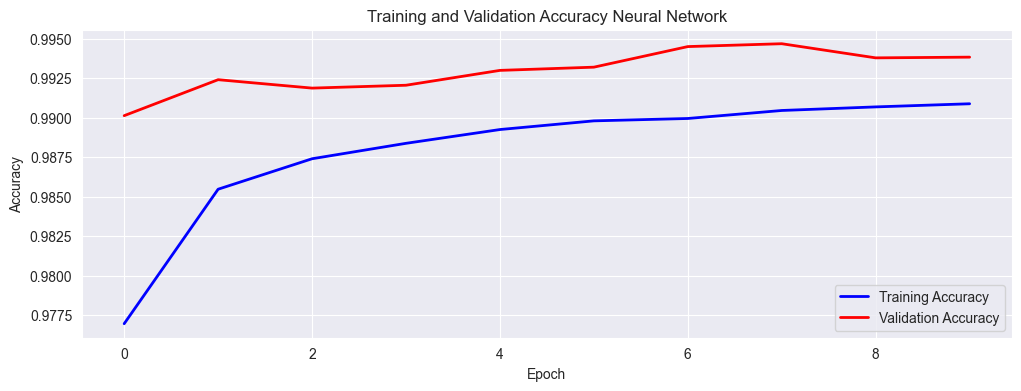

In [9]:
# Plot the learning curves of the neural network
import matplotlib.pyplot as plt


# Plot the training and validation accuracy
plt.figure(figsize=(12, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red', linewidth=2)
plt.title('Training and Validation Accuracy Neural Network')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


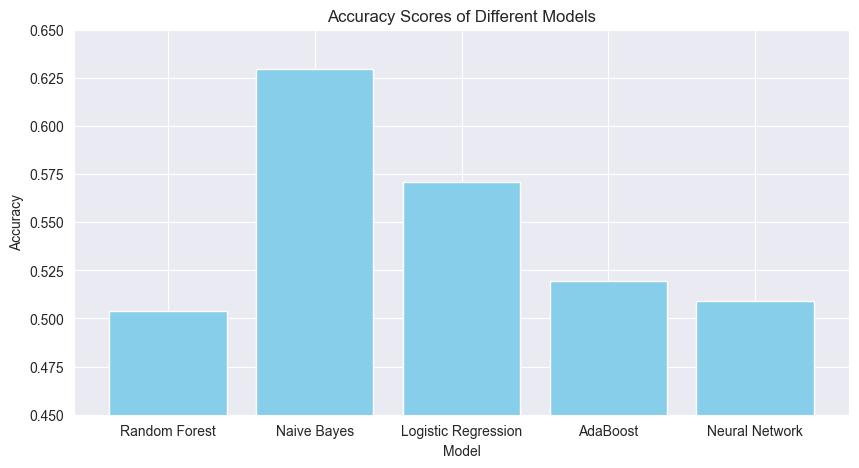

In [10]:
# plot accuracy of all models
accuracy_scores = {
    'Random Forest': random_forest_accuracy,
    'Naive Bayes': naive_bayes_accuracy,
    'Logistic Regression': logreg_accuracy,
    'AdaBoost': adaboost_accuracy,
    'Neural Network': neural_network_accuracy
}

plt.figure(figsize=(10, 5))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.title('Accuracy Scores of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.45, 0.65)

plt.show()



# Conclusion

We have trained and evaluated several models to predict customer churn. 

The most challenging part is to test the models with the test data and evaluate the performance.

The accuracy scores of the models are as follows:

- **Random Forest: 0.50**
- **Naive Bayes: 0.63**
- **Logistic Regression: 0.57**
- **AdaBoost: 0.52**
- **Neural Network: 0.50**

It seems that our models are not performing very well, with the best model (Naive Bayes) achieving an accuracy of 0.63. This suggests that there may be some underlying issues with the data or the models that we have used.

Over-fitting is a common problem in machine learning, and it occurs when a model learns to perform well on the training data but fails to generalize to new, unseen data. This can happen if the model is too complex or if there is not enough training data. In our case, we have a relatively small dataset with only a few thousand samples, which may not be enough to train complex models like neural networks.

Another potential issue is the quality of the data. If the features do not contain enough information to predict the target variable, then no model will be able to achieve high accuracy. It's also possible that the features are not well-suited to the models that we have used, or that there are interactions between the features that are not being captured.

To improve the performance of our models, we could try the following:

- Feature engineering: Create new features from the existing ones, or transform the existing features in a way that makes them more informative.
- Model selection: Try different types of models, or tune the hyperparameters of the models that we have used to see if we can get better performance.

## Problems with Cross-Validation
Cross-Validation on this specific dataset was not quite useful, even though the accuracy score was higher on training data, the model was not able to generalize well on the test data. 
